## **Customer Churn rate Prediction Model**

#### **Business Understanding**

Customer attrition, or churn, is one of the most significant expenses for any organization. It represents the percentage of customers who discontinue using a company's product or service within a given timeframe. For example, if a company starts the year with 500 customers and ends with 480, the churn rate would be 4%. Understanding and mitigating this churn is crucial for sustaining growth and profitability.

##### Problem Statement
A few months ago, Vodafone experienced a significant loss of customers due to heightened competition within the telecommunications industry. This decline in customer retention has adversely impacted their revenue and profit margins. To address this issue and improve their competitive position, Vodafone aims to understand the factors contributing to customer churn and develop effective strategies to retain their customers.


 ##### Project Goal

By leveraging advanced data analytics and machine learning techniques, we aim to provide Vodafone with valuable insights and tools to effectively combat customer churn and strengthen their market position.

In this project, we will analyze Vodafone's customer data to:

-Identify Key Indicators of Churn: Determine the primary factors that influence customers to leave Vodafone, such as service quality, pricing, customer support, and promotional offers.

-Predict Customer Churn: Develop a predictive model to accurately identify customers at risk of churning, allowing proactive retention efforts.

-Develop Retention Strategies: Suggest actionable strategies based on the analysis to improve customer satisfaction and loyalty, ultimately reducing churn rates and enhancing Vodafone's revenue and profitability.



##### Stakeholders

- Management
- Marketing
- Data Team

##### Key Metrics and Success Criteria 

1. Accuracy- The model should have an accuracy score of 85% (On balanced data). Good models are expected to have an accuracy score of >0.80 or 80%
2. Threshold for precision and Recall- The model should achieve a precision and recall at least 80%. This assures that the model is reliable in predicting churn and identifying most of the actual churn.
3. Minimu F1 Score- The F1 score should be at least 0.75. This balances the trade off between precision and recalls, indicating the model performs well even if the clas distribution is imbalanced.
4. AUC-ROC Score- This should be at least 0.85. A high AUC-ROC score indicates that the model is effective in distinguishing between churn and not churn customers.
5. Confusion Matrix- The number of False Negatives (FN) should be lower to ensure that most of the churn cases are identified.
6. Lift and Gain- The lift value at the top decline (top ten of predicted probabilities) should be significantly higher than 1 indicating that the model effectively has high risk of churn customers.



##### Features

CustomerID-- A unique customer identification

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

In [2]:
# %pip install pyodbc  
# %pip install python-dotenv 
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install sqlalchemy pyodbc
# %pip install openpyxl
# %pip install statsmodels
# %pip install pandas plotly openpyxl
# # %pip install --upgrade pip
# %pip install nbformat
# %pip install xgboost
# %pip install phik 
# %pip install imbalanced-learn

In [6]:
# Data Manipulation Packages 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pyodbc
from dotenv import dotenv_values
import scipy.stats as stats
import warnings

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score, GridSearchCV
warnings.filterwarnings('ignore')



In [7]:
#Load environment variables from .env file into a dictionary
environment_variables = dotenv_values(r'G:\python\python project\project\Churn-rate-Prediction-Model\.env')

#Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#Create a connection string
connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=200"

connection = pyodbc.connect(connection_string)
print("Connection successful")

Connection successful


### **Exploring All Datasets (EDA) & Data Cleaning**

#### **Load Datasets**

In [7]:
# # Loading the First 3000 dataset
# query = "SELECT * FROM LP2_Telco_churn_first_3000"

# data = pd.read_sql(query, connection)

# data.head()

In [8]:
# data.info()

In [9]:
# data.head()

### ***Import the second data set and third**

In [10]:
# data2= pd.read_csv(r"G:\python\python project\project\Churn-rate-Prediction-Model\data\LP2_Telco-churn-second-2000.csv")
# data3= pd.read_excel(r"G:\python\python project\project\Churn-rate-Prediction-Model\data\Telco-churn-last-2000.xlsx") 

In [11]:
# data2.head()

In [12]:
# data.info()

##### Merge  datasets 1 and 2 for traing

In [13]:
# train= pd.concat([data,data2], ignore_index= True)
# train

In [14]:
# train.replace(True, 'Yes', inplace=True)
# train.replace(False, 'No', inplace=True)
# train

In [15]:
# train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')

In [16]:
# train.info()

In [17]:
# train.head()

In [18]:
# train.tail()

In [19]:
# train.isnull().sum().to_frame('Null Count').assign(Percentage=lambda x: (x['Null Count'] / len(train)) * 100)

In [20]:
# train.duplicated().sum()

In [21]:
# train.describe(include= 'object').T

In [22]:
# columns= train.columns
# columns

In [23]:
# # Unique values in each column
# for column in columns:
#     print(f'{column}')
#     print(f'There are {train[column].unique().size} unique values')
#     print(f'These are {train[column].unique()}')
#     print('=' * 50)

##### Key Insights
- There some null values and unique values in the datasets
- There are no duplicated values for this project.
- From the mean and median in total charges it not the same hence there will be a lot of outliers.

# Univariate Analysis

In [24]:
# train.hist(figsize=(16,8), grid =False, color='skyblue')

# plt.suptitle('Histograms of Numerical Features', x=0.5, y=1.02, fontsize=16)

# plt.show()

In [25]:
# # Create a figure with the specified size
# plt.figure(figsize=(10,8))
# sns.kdeplot(train.drop(['SeniorCitizen','TotalCharges'], axis=1), color='skyblue')
# plt.grid(False)
# plt.title('Kernel Density Estimation of Numerical Features of Tenure & Monthly Charges', fontsize=16)

# plt.show()

In [26]:
# plt.figure(figsize=(14,10))
# sns.kdeplot(train['TotalCharges'])

# plt.title('Kernel Density Estimation of Numerical Features of Total Charges', fontsize=16)
# plt.show()

In [28]:
# plt.figure(figsize=(14,10))
# sns.kdeplot(train['SeniorCitizen'])

# plt.title('Kernel Density Estimation of Numerical Features of Senior Citizen', fontsize=16)
# plt.show()

In [29]:
# # Create a box plot for multiple columns
# plt.figure(figsize=(10, 6))
# sns.boxplot(train[['tenure', 'MonthlyCharges']])
 
# # Add titles and labels
# plt.title('Box Plot of tenure & Monthly Charges')
# plt.xlabel('Variables')
# plt.ylabel('Distribution')
 
# plt.grid(False)
 
# # Display the plot
# plt.show()

### Bi-Variate Analysis

In [30]:
# numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
# numerical_columns

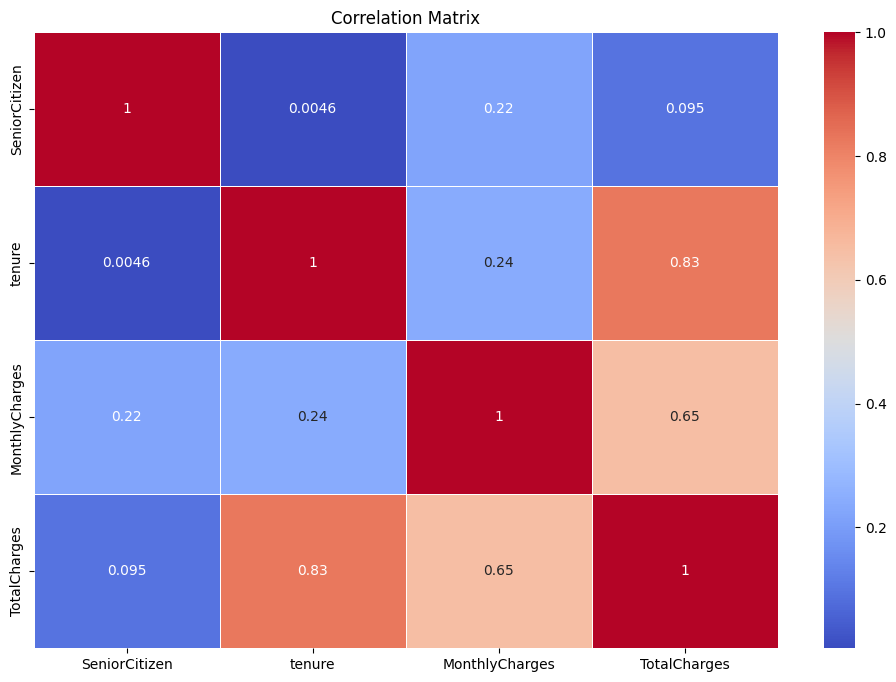

In [ ]:
# numeric_df = train.select_dtypes(include=[np.number])
# corr_matrix = numeric_df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

In [32]:
# plt.figure(figsize=(10, 6))
# sns.violinplot(x='Contract', y='Churn', data=data2, palette='muted')
# plt.title('Monthly Charges by Contract Type')
# plt.xlabel('Contract Type')
# plt.ylabel('Churn')
# plt.show()

### Multi-Variate Analysis

In [33]:
# sns.pairplot(train[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
# plt.show()

### Answering Analytical Questions

In [34]:
# ### Demographics associated with churn

# # Gender vs Churn
# gender_churn = train.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
# gender_churn['Churn Rate'] = gender_churn['Yes'] * 100
 
# # Senior Citizen vs Churn
# senior_churn = train.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
# senior_churn['Churn Rate'] = senior_churn['Yes'] * 100

# # Plotting
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# sns.barplot(x=gender_churn.index, y='Churn Rate', data=gender_churn, ax=axes[0])
# sns.barplot(x=senior_churn.index, y='Churn Rate', data=senior_churn, ax=axes[1])
# axes[0].set_title('Churn Rate by Gender')
# axes[1].set_title('Churn Rate by Senior Citizen')
# plt.tight_layout()
# plt.show()


In [35]:
# # Group by tenure bins and churn
# train['tenure_bins'] = pd.cut(train['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
# churn_by_tenure = train.groupby('tenure_bins')['Churn'].value_counts(normalize=True).unstack()
# churn_by_tenure

In [36]:
# # Plotting churn by tenure bins
# plt.figure(figsize=(12, 6))
# sns.countplot(data=train, x='tenure_bins', hue='Churn', palette={'Yes':'pink', 'No':'skyblue'})
# plt.title('Churn by Tenure Bins')
# plt.xlabel('Tenure (months)')
# plt.ylabel('Count')
# plt.legend(title='Churn')
# plt.show()

In [37]:
# # Internet Service vs Churn
# internet_churn = train.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
# internet_churn['Churn Rate'] = internet_churn['Yes'] * 100
 
# # Plotting
# sns.barplot(x=internet_churn.index, y='Churn Rate', data=internet_churn)
# plt.title('Churn Rate by Internet Service')
# plt.show()

In [38]:
# # Contract vs Churn
# contract_churn = train.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
# contract_churn['Churn Rate'] = contract_churn['Yes'] * 100
 
# # Plotting
# sns.barplot(x=contract_churn.index, y='Churn Rate', data=contract_churn)
# plt.title('Churn Rate by Contract Type')
# plt.show()

In [39]:
# # Tech Support vs Churn
# techsupport_churn = train.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack()
# techsupport_churn['Churn Rate'] = techsupport_churn['Yes'] * 100
 
# # Plotting
# sns.barplot(x=techsupport_churn.index, y='Churn Rate', data=techsupport_churn)
# plt.title('Churn Rate by Tech Support')
# plt.show()

In [40]:
# # Set the aesthetic style of the plots
# sns.set(style="whitegrid")

# # Create a bar chart for the 'Contract' column
# plt.figure(figsize=(10, 6))
# sns.countplot(train, x='PaymentMethod', order=train['PaymentMethod'].value_counts().index)

# # Add titles and labels
# plt.title('Bar Chart of PaymentMethod Distribution')
# plt.xlabel('PaymentMethod')
# plt.ylabel('Frequency')

# plt.grid(False)

# # Display the plot
# plt.show()

#### **Hypothesis Testing**

##### Null Hypothesis
 ##### (HO) There is no significant difference in churn rates among customers with different contract types.
##### Alternative Hpothesis
##### (H1) There is a significant difference in churn rates among customers with different contract types.

In [41]:
# # Drop the row with the unknown value from the Churn column
# train.drop(index=2988, inplace=True)
# train.reset_index(drop=True, inplace=True)

# # Drop 'customerID' column as it is not needed for analysis
# train.drop(columns=['customerID'], axis=1, inplace=True)

# # Convert Churn to binary
# train['Churn'] = train['Churn'].map({'Yes': 1, 'No': 0})
# train
# # Replace invalid TotalCharges with NaN
# train['TotalCharges'] = pd.to_numeric(train['TotalCharges'], errors='coerce')

# # Define numerical and categorical columns
# num_columns = train.select_dtypes(include=['number']).columns
# cat_columns = train.select_dtypes(include=['object']).columns

# # Impute missing values for numerical columns
# imputer_num = SimpleImputer(strategy='median')
# train[num_columns] = imputer_num.fit_transform(train[num_columns])

# # Impute missing values for categorical columns
# imputer_cat = SimpleImputer(strategy='most_frequent')
# train[cat_columns] = imputer_cat.fit_transform(train[cat_columns])

# # Create contingency table for Churn and Contract
# contingency_table = pd.crosstab(train['Churn'], train['Contract'])

# # Perform Chi-Square Test of Independence
# chi2, p, dof, expected = chi2_contingency(contingency_table)

# # Output the results
# print("Chi-Square Test")
# print("----------------")
# print(f"Chi-Square Statistic: {chi2}")
# print(f"P-value: {p}")
# print(f"Degrees of Freedom: {dof}")

# # Interpret the result based on the p-value
# alpha = 0.05
# if p < alpha:
#     print("Reject the null hypothesis: This means there is a significant difference in churn rates among customers with different contract types.")
# else:
#     print("Fail to reject the null hypothesis: This means there is no significant difference in churn rates among customers with different contract types.")


### Data Preparation

In [42]:
# train.head()

#### Handling misssing values 

In [43]:
# train['TotalCharges'].fillna(train['TotalCharges'].median(), inplace=True) # TotalCharges column 


In [44]:
# miss_categ = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',                   #For missing values in categorical columns 
#                        'DeviceProtection', 'TechSupport', 'StreamingTV', 
#                        'StreamingMovies', 'Churn']

# for col in miss_categ:
#     mode_val = train[col].mode()[0]                                      
#     train[col].fillna(mode_val, inplace=True)

### **Save dataset into Csv file** 

In [45]:
# train.to_csv("train.csv", index= True)

In [46]:
# train.isnull().sum()

In [47]:
# train.head()

####  **Split data to X and y (Input and Output variables )**

In [48]:
# X= train.drop('Churn', axis= 1)
# X.head()

In [49]:
# y= train['Churn']
# y.value_counts()

In [50]:
# X.shape, y.shape

#### **Split data to categorical and numerical columns**

In [51]:
# numerical_columns= X.select_dtypes('number').columns
# print(f"The following are numerical columns{numerical_columns}")

# print(f"...........................................................................")
# categorical_columns= X.select_dtypes('object').columns
# print(f"\n The folllowing are categorical columns{categorical_columns}")


In [52]:
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# # Print the shapes of the resulting datasets
# (X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

In [53]:
# # We use a lable encoder for y because its not a 2 dimentional array 

# encoder = LabelEncoder()

# # Fit the encoder to the target variable
# y_train_encoded= encoder.fit_transform(y_train)
# y_test_encoded= encoder.transform(y_test)

In [54]:
# # Check skewness to determine which scaler to use 
# X.select_dtypes('number').skew()

### Descison
Standard scaler is disqualified as our data not anything close to a bell shape 
MinMax scaller is diqualified as our data has outliers 
We use Robust Scaler due to the biases in X train  

In [55]:
# X.describe().T

We decide on Quantile transformer as it transform our data to a close to a bell shape

#### *Pipeline*

In [56]:
# numeric_pipeline= Pipeline(steps=[ 
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', RobustScaler()),
#     ('QuantileTransformation', QuantileTransformer ()),
# ])

# categorical_pipeline= Pipeline([
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('encoder', OneHotEncoder()),
    
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num_pipeline', numeric_pipeline, numerical_columns),
#     ('cat_pipeline', categorical_pipeline, categorical_columns),

# ])

In [57]:
# preprocessor

#### **Modeling & Evaluation**

In [58]:
# # Define the models
# models = [
#     ('Logistic Regression', LogisticRegression(random_state=42)),
#     ('Random Forest', RandomForestClassifier(random_state=42)),
#     ('KNN', KNeighborsClassifier()),
#     ('SVM', SVC(probability=True, random_state=42)),
#     ('GBM', GradientBoostingClassifier(random_state=42)),
#     ('Neural Network', MLPClassifier(random_state=42))
# ]


# # Arrays to store individual model predictions and their probabilities
# model_predictions = {}
# model_probabilities = {}

# # Store confusion matrices for each model
# confusion_matrices = {}

# for model_name, classifier in models:
#     # Define the pipeline with the classifier
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', classifier)
#     ])

#     # Fit the pipeline on training data
#     pipeline.fit(X_train, y_train_encoded)

#     # Predict on test data
#     y_pred = pipeline.predict(X_test)
#     y_prob = pipeline.predict_proba(X_test)[:, 1]

#     # Store predictions and probabilities
#     model_predictions[model_name] = y_pred
#     model_probabilities[model_name] = y_prob
#     # Store confusion matrix
#     cm = confusion_matrix(y_test_encoded, y_pred)
#     confusion_matrices[model_name] = cm

#     # Evaluate model performance
#     print(model_name)
#     print(classification_report(y_test_encoded, y_pred))
#     print('=' * 50)

#     # Calculate ROC AUC score
#     roc_auc = roc_auc_score(y_test_encoded, y_prob)

#     # Print ROC AUC score
#     print(f'ROC AUC Score: {roc_auc:.4f}')
#     print('=' * 50)


In [59]:
# # Convert confusion matrices to DataFrame
# df_scores = pd.DataFrame.from_dict({model_name: [conf_matrix] for model_name, conf_matrix in confusion_matrices.items()}, orient='index', columns=['confusion_matrix'])
# df_scores 

In [60]:
# def plot_confusion_matrices(df_scores, figsize=(15, 8), ncols=3):
#     nrows = int(np.ceil(len(df_scores) / ncols))
#     fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
#     axes = axes.flatten()
    
#     for i, (model_name, row) in enumerate(df_scores.iterrows()):
#         conf_matrix = row['confusion_matrix']
#         ax = axes[i]
#         sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#                     xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=ax)
#         ax.set_xlabel('Predicted labels')
#         ax.set_ylabel('True labels')
#         ax.set_title(f'Confusion Matrix - {model_name}')
    
#     plt.tight_layout()
#     plt.show()

# plot_confusion_matrices(df_scores)

In [61]:
# # Plot ROC AUC curve for all models
# plt.figure(figsize=(10, 8))

# # Iterate over each model's probabilities and plot ROC curve
# for model_name, y_prob in model_probabilities.items():
#     # Compute ROC curve
#     fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)
#     roc_auc = auc(fpr, tpr)
    
#     # Plot ROC curve
#     plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# # Plot random guessing line
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# # Set plot properties
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.grid(False)
# plt.show()

#### **Hyperparameter Tuning**

In [62]:
# param_grids = {
#     'Logistic Regression': {
#         'classifier__C': [0.01, 0.1, 1, 10, 100],
#         'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
#     },
#     'Random Forest': {
#         'classifier__n_estimators': [100, 200, 300],
#         'classifier__max_depth': [None, 10, 20, 30],
#         'classifier__min_samples_split': [2, 5, 10]
#     },
#     'KNN': {
#         'classifier__n_neighbors': [3, 5, 7, 9],
#         'classifier__weights': ['uniform', 'distance']
#     },
#     'SVM': {
#         'classifier__C': [0.1, 1, 10, 100],
#         'classifier__kernel': ['linear', 'rbf']
#     },
#     'GBM': {
#         'classifier__n_estimators': [100, 200, 300],
#         'classifier__learning_rate': [0.01, 0.1, 0.2],
#         'classifier__max_depth': [3, 4, 5]
#     },
#     'Neural Network': {
#         'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
#         'classifier__activation': ['tanh', 'relu'],
#         'classifier__solver': ['sgd', 'adam'],
#         'classifier__alpha': [0.0001, 0.001, 0.01]
#     }
# }

In [63]:
# # Perform Hyperparameter Tuning

# best_estimators = {}

# for model_name, classifier in models:
#     # Define the pipeline with the classifier
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', classifier)
#     ])

#     # Get the parameter grid for the current model
#     param_grid = param_grids[model_name]
    
#     # Set up GridSearchCV
#     grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    
#     # Fit the GridSearchCV
#     grid_search.fit(X_train, y_train_encoded)
    
#     # Store the best estimator
#     best_estimators[model_name] = grid_search.best_estimator_

#     # Calculate metrics
#     accuracy = accuracy_score(y_test_encoded, y_pred)
#     precision = precision_score(y_test_encoded, y_pred)
#     recall = recall_score(y_test_encoded, y_pred)
#     f1 = f1_score(y_test_encoded, y_pred)
#     auc_roc = roc_auc_score(y_test_encoded, y_prob)
    
#     # Print best parameters and ROC AUC score
#     print(f'Best parameters for {model_name}: {grid_search.best_params_}')
#     print(f'Best ROC AUC score for {model_name}: {grid_search.best_score_:.4f}')
#     print(f'Accuracy: {accuracy:.4f}')
#     print(f'Precision: {precision:.4f}')
#     print(f'Recall: {recall:.4f}')
#     print(f'F1 Score: {f1:.4f}')
    
#     print('=' * 50)

Trying it on both balanced and unbalanced data for comparison. For the Balanced data we did oversampling using smote 

In [64]:

# models = [
#     ('Logistic Regression', LogisticRegression(random_state=42)),
#     ('Random Forest', RandomForestClassifier(random_state=42)),
#     ('KNN', KNeighborsClassifier()),
#     ('SVM', SVC(probability=True, random_state=42)),
#     ('GBM', GradientBoostingClassifier(random_state=42)),
#     ('Neural Network', MLPClassifier(random_state=42))
# ]


#### **Train on unbalanced data**

In [65]:
# unbalanced_table =pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
# unbalanced_pipeline= {}
 
# for model_name, classifier in models:
   
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', classifier)
#     ])
 
#     pipeline.fit(X_train,y_train_encoded)
   
#     unbalanced_pipeline [model_name]= pipeline
 
#     y_pred = pipeline.predict(X_test)
 
   
#     unbalanced_metrics= classification_report(y_test_encoded, y_pred, output_dict=True)
 
#     accuracy= unbalanced_metrics['accuracy']
#     precision = unbalanced_metrics['weighted avg']['precision']
#     recall = unbalanced_metrics['weighted avg']['recall']
#     f1 = unbalanced_metrics['weighted avg']['f1-score']
 
#     unbalanced_table.loc[len(unbalanced_table)]= [model_name, accuracy, precision, recall,f1]
 
# unbalanced_table.sort_values(by='F1_Score')

#### **Train on balanced data**

In [66]:
# from imblearn.over_sampling import SMOTE, RandomOverSampler
# from imblearn.pipeline import Pipeline as imbPipeline

# balanced_table =pd.DataFrame(columns=['Model','Accuracy', 'Precision', 'Recall', 'F1_Score'])
# balanced_pipeline= {}
 
# for model_name, classifier in models:
   
#     pipeline = imbPipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('OverSampler', SMOTE(random_state=42)),
#         ('classifier', classifier)
#     ])
 
#     pipeline.fit(X_train,y_train_encoded)
   
#     balanced_pipeline [model_name]= pipeline
 
#     y_pred = pipeline.predict(X_test)
 
   
#     balanced_metrics= classification_report(y_test_encoded, y_pred, output_dict=True)
 
#     accuracy= balanced_metrics['accuracy']
#     precision = balanced_metrics['weighted avg']['precision']
#     recall = balanced_metrics['weighted avg']['recall']
#     f1 = balanced_metrics['weighted avg']['f1-score']
 
#     balanced_table.loc[len(balanced_table)]= [model_name, accuracy, precision, recall,f1]
 
# balanced_table.sort_values(by='F1_Score')

In [67]:
# # View balanced data pipelines 
# balanced_pipeline

#### **Answering Analytical Questions** 

In [68]:
#  #1. What is the Churn percentage as compared to paymment method 

# churn_percentage = train.groupby('PaymentMethod')['Churn'].mean() * 100 
# churn_percentage = churn_percentage.reset_index()
# churn_percentage.columns = ['PaymentMethod', 'ChurnPercentage']
# print(churn_percentage)


# # Create a bar plot of churn percentage by payment method
# plt.figure(figsize=(10, 6))
# sns.barplot(x='PaymentMethod', y='ChurnPercentage', data=churn_percentage)

# # Add title and labels
# plt.title('Churn Percentage by Payment Method')
# plt.xlabel('Payment Method')
# plt.ylabel('Churn Percentage')

# # Rotate x labels for better readability
# plt.xticks(rotation=45)

# plt.grid(False)

# # Show plot
# plt.show()

In [69]:
# #2. How does key demographic factors (i.e, 'gender', 'Partner', 'SeniorCitizen', 'Dependents') influence customer churn?


# # Define the demographic features
# demographic_features = ['gender', 'Partner', 'SeniorCitizen', 'Dependents']

# # Plotting the churn rates for each demographic feature
# plt.figure(figsize=(14, 10))

# for i, feature in enumerate(demographic_features, 1):
#     plt.subplot(2, 2, i)
#     churn_rates = train.groupby(feature)['Churn'].mean() * 100
#     sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
#     plt.title(f'Churn Rate by {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Churn Rate (%)')
#     plt.grid(False)

# plt.tight_layout()
# plt.show()


In [70]:
# #6. How do different contract types affect customer churn?

# # Plotting the count of churn for each contract type
# plt.figure(figsize=(10, 6))
# sns.countplot(data=train, x='Contract', hue='Churn', palette='muted')
# plt.title('Comparison of Churn by Contract Type')
# plt.xlabel('Contract Type')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.grid(False)
# plt.show()

In [71]:
# #3. How does the tenure of a customer impact their likelihood of churning?


# np.random.seed(0) #enuring the starting point is the same every time
# n_customers = 1000 # Setting a sumple for number if customers we are working with in this particular graph
# tenure_months = np.random.randint(1, 36, size=n_customers) #Generate tenure data to ensure we simulate the number of months the customer has been 
# churn_prob = np.clip(0.05 * tenure_months, 0, 0.8)  # Calculate churn probability
# churned = np.random.random(size=n_customers) < churn_prob # Generating churn data
# churn_prime = pd.DataFrame({'tenure': tenure_months, 'Churn': churned}) # Create a dataframe with the generated tenure and churn data

# # Define tenure buckets 
# tenure_bins = [0, 6, 12, 18, 24, 30, 36]
# tenure_labels = ['0-6', '6-12', '12-18', '18-24', '24-30', '30-36']

# # Assign each customer to a tenure bucket
# churn_prime['tenure_bucket'] = pd.cut(churn_prime['tenure'], bins=tenure_bins, labels=tenure_labels, right=False)

# # Calculate churn rates for each tenure bucket
# churn_rates = churn_prime.groupby('tenure_bucket')['Churn'].mean() * 100

# # Plotting the churn rates
# plt.figure(figsize=(10, 6))
# sns.barplot(x=churn_rates.index, y=churn_rates.values, color='skyblue')
# plt.title('Churn Rate by Tenure')
# plt.xlabel('Tenure (months)')
# plt.ylabel('Churn Rate (%)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.grid (False)
# plt.show()

In [72]:
# #4. Is there a significant correlation between the type of internet service and customer churn?

# from scipy.stats import chi2_contingency
# # Data generation 
# np.random.seed(0)
# data = pd.DataFrame({
#     'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=1000),
#     'Churn': np.random.choice([0, 1], size=1000)
# })

# # Calculate churn rates by internet service type
# churn_rates = data.groupby('InternetService')['Churn'].mean() * 100

# # Perform chi-square test
# # contingency_table = pd.crosstab(data['InternetService'], data['Churn'])
# chi2, p, dof, expected = chi2_contingency(contingency_table)

# # Print chi-square test results
# print(f'Chi2 Statistic: {chi2}')
# print(f'P-Value: {p}')

# # Plot churn rates
# plt.figure(figsize=(10, 6))
# sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
# plt.title('Churn Rate by Internet Service Type')
# plt.xlabel('Internet Service Type')
# plt.ylabel('Churn Rate (%)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.grid (False)
# plt.show()

# # Interpretation
# if p < 0.05:
#     print("There is a significant association between Internet Service Type and Churn (p < 0.05).")
# else:
#     print("There is no significant association between Internet Service Type and Churn (p >= 0.05).")


In [73]:
# #5. Do customers with multiple services show different churn rates compared to those with  fewer services?

# # Data generation 
# np.random.seed(0)
# n_customers = 1000
# data = pd.DataFrame({
#     'PhoneService': np.random.choice(['Yes', 'No'], size=n_customers),
#     'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n_customers),
#     'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], size=n_customers),
#     'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
#     'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
#     'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
#     'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
#     'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
#     'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], size=n_customers),
#     'Churn': np.random.choice([0, 1], size=n_customers)
# })

# # Define a function to count the number of services a customer has
# def count_services(row):
#     services = ['PhoneService', 'InternetService', 'MultipleLines', 'OnlineSecurity', 
#                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
#     count = 0
#     for service in services:
#         if row[service] in ['Yes', 'DSL', 'Fiber optic']:
#             count += 1
#     return count

# # Create a new column for the number of services
# data['NumberOfServices'] = data.apply(count_services, axis=1)

# # Calculate churn rates by number of services
# churn_rates = data.groupby('NumberOfServices')['Churn'].mean() * 100

# # Plotting the churn rates
# plt.figure(figsize=(10, 6))
# sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='pastel')
# plt.title('Churn Rate by Number of Services')
# plt.xlabel('Number of Services')
# plt.ylabel('Churn Rate (%)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.grid (False)
# plt.show()

In [74]:
# from sklearn.impute import SimpleImputer #filling mising values

# # For categorical features, use the most frequent value
# categorical_imputer = SimpleImputer(strategy='most_frequent')

# # For numerical features, use the median
# numerical_imputer = SimpleImputer(strategy='median')

In [75]:
# from sklearn.preprocessing import OneHotEncoder #Encoding

# categorical_encoder = OneHotEncoder(handle_unknown='ignore')

In [76]:
# from sklearn.pipeline import Pipeline # Create a preprocesing pipeline 

# categorical_pipeline = Pipeline([
#    ('imputer', categorical_imputer),
#     ('encoder', categorical_encoder)
# ])

# numerical_pipeline = Pipeline([
#    ('imputer', numerical_imputer),
#     # ('scaler', numerical_scaler)
# ])

In [77]:
# from sklearn.compose import ColumnTransformer # Combine our pipelines 

# preprocessor = ColumnTransformer([
#     ('cat', categorical_pipeline, categorical_features),
#     ('num', numerical_pipeline, numerical_features)
# ])

In [78]:
# from sklearn.ensemble import RandomForestClassifier # Build the final pipeline with  a ml model

# model = Pipeline([
#     ('preprocessor', preprocessor),
#    ('classifier', RandomForestClassifier())
# ])


In [79]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #train and evaluate the model 

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
# print('Classification Report:\n', classification_report(y_test, y_pred))

#### Checklist 
    - Missing values are handled 
    - True to yes and false to no 
    - Column names renaming 
    - Monthlycharge and Totalcharge columns need standardized decimals
    - Total charges column should be a float datatype
    - At least 5 Univariate Bivariate Multivariate Analysis 
    - Categorical columns analysis 
    - Hypothesis 
    - Visuals should check colinearity  Churn rate distribution
    - Analytical Questions 
    - Atleast 4 models
    - Evaluation
    - Choose 1 model - key metrics must be met 
    - Hyperparameter tuning must 
    - Predict test set and visualize resulst
    - Ensure to highlight at least 5 key insights, challanges and way forward 
    - Must have a conclusion